# Compare customer reviews on Singapore Airlines and Malaysian Airlines


## Step 1: Data collection



### Import libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as plio
plio.templates
import plotly.graph_objs as go
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import seaborn as sns
import nltk
# Download the vader_lexicon resource
nltk.download('vader_lexicon')
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from warnings import filterwarnings
filterwarnings(action='ignore')

import scattertext as st
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

from IPython.display import IFrame

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hesha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


### Scraping the data

#### Singapore Airlines

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/singapore-airlines/"
pages = 16
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1522 total reviews


In [3]:
SIA_df = pd.DataFrame()
SIA_df["reviews"] = reviews
SIA_df

,reviews
0,Not Verified | The flight was delayed for almo...
1,"✅ Trip Verified | Book the cook worked well, ..."
2,✅ Trip Verified | The customer service is a n...
3,Not Verified | No inflight entertainment at a...
4,✅ Trip Verified | The experience was very goo...
...,...
1517,LHR-SIN on 777 excellent service as usual good...
1518,ICN-SIN SIN-TPE. It was a superb journey with ...
1519,SFO-ICN (refuelling stop) - SIN-DEL route. The...
1520,SYD-PEK return via SIN in Y class. 3 legs in 7...


In [4]:
SIA_df.to_csv("SIA_reviews.csv")

Note: Some reviews does not have a verification status. These are also marked as `Not Verified`

In [5]:
# Split the text into two columns
split_data = SIA_df['reviews'].str.split('|', n=1, expand=True)

# Use numpy.where to conditionally fill the columns
SIA_df['Verification Status'] = np.where(SIA_df['reviews'].str.contains('Verified', na=False), split_data[0], 'Not Verified')
SIA_df['review'] = np.where(SIA_df['reviews'].str.contains('Verified', na=False), split_data[1], SIA_df['reviews'])


In [6]:
SIA_df

,reviews,Verification Status,review
0,Not Verified | The flight was delayed for almo...,Not Verified,The flight was delayed for almost 4 hours. Th...
1,"✅ Trip Verified | Book the cook worked well, ...",✅ Trip Verified,"Book the cook worked well, my seatmate got e..."
2,✅ Trip Verified | The customer service is a n...,✅ Trip Verified,The customer service is a nightmare. I have ...
3,Not Verified | No inflight entertainment at a...,Not Verified,"No inflight entertainment at all. Yes, we ar..."
4,✅ Trip Verified | The experience was very goo...,✅ Trip Verified,The experience was very good on both Outboun...
...,...,...,...
1517,LHR-SIN on 777 excellent service as usual good...,Not Verified,LHR-SIN on 777 excellent service as usual good...
1518,ICN-SIN SIN-TPE. It was a superb journey with ...,Not Verified,ICN-SIN SIN-TPE. It was a superb journey with ...
1519,SFO-ICN (refuelling stop) - SIN-DEL route. The...,Not Verified,SFO-ICN (refuelling stop) - SIN-DEL route. The...
1520,SYD-PEK return via SIN in Y class. 3 legs in 7...,Not Verified,SYD-PEK return via SIN in Y class. 3 legs in 7...


In [7]:
SIA_df = SIA_df.drop('reviews', axis=1)
SIA_df['Airline'] = 'Singapore Airlines'

In [8]:
SIA_df

,Verification Status,review,Airline
0,Not Verified,The flight was delayed for almost 4 hours. Th...,Singapore Airlines
1,✅ Trip Verified,"Book the cook worked well, my seatmate got e...",Singapore Airlines
2,✅ Trip Verified,The customer service is a nightmare. I have ...,Singapore Airlines
3,Not Verified,"No inflight entertainment at all. Yes, we ar...",Singapore Airlines
4,✅ Trip Verified,The experience was very good on both Outboun...,Singapore Airlines
...,...,...,...
1517,Not Verified,LHR-SIN on 777 excellent service as usual good...,Singapore Airlines
1518,Not Verified,ICN-SIN SIN-TPE. It was a superb journey with ...,Singapore Airlines
1519,Not Verified,SFO-ICN (refuelling stop) - SIN-DEL route. The...,Singapore Airlines
1520,Not Verified,SYD-PEK return via SIN in Y class. 3 legs in 7...,Singapore Airlines


#### Malaysian Airlines

In [9]:
base_url = "https://www.airlinequality.com/airline-reviews/malaysia-airlines/"
pages = 14
page_size = 100

reviews_MAB = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews_MAB.append(para.get_text())
    
    print(f"   ---> {len(reviews_MAB)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1384 total reviews


In [10]:
MAB_df = pd.DataFrame()
MAB_df["reviews"] = reviews_MAB
MAB_df

,reviews
0,✅ Trip Verified | Four flights in six days (2...
1,✅ Trip Verified | Air conditioner wasn’t work...
2,✅ Trip Verified | Malaysia Airlines codeshare...
3,"Not Verified | Not the best airline, definite..."
4,✅ Trip Verified | Smooth journey on both inte...
...,...
1379,Jakarta (CGK) to Amsterdam (AMS) via Kuala Lum...
1380,I travel with them at least once a month eithe...
1381,BKI-KUL on 9 Sep 2013. Fly their new B737-800 ...
1382,Flew CDG-KUL in Business on A380. Ground staff...


In [11]:
MAB_df.to_csv("MAB_reviews.csv")

Note: There are reviews without `verified` tags. So the division to the two columns should be conditional

In [12]:
# Split the text into two columns
split_data = MAB_df['reviews'].str.split('|', n=1, expand=True)

# Use numpy.where to conditionally fill the columns
MAB_df['Verification Status'] = np.where(MAB_df['reviews'].str.contains('Verified', na=False), split_data[0], 'Not Verified')
MAB_df['review'] = np.where(MAB_df['reviews'].str.contains('Verified', na=False), split_data[1], MAB_df['reviews'])


MAB_df

,reviews,Verification Status,review
0,✅ Trip Verified | Four flights in six days (2...,✅ Trip Verified,"Four flights in six days (2 x transfers), al..."
1,✅ Trip Verified | Air conditioner wasn’t work...,✅ Trip Verified,"Air conditioner wasn’t working very well, mo..."
2,✅ Trip Verified | Malaysia Airlines codeshare...,✅ Trip Verified,Malaysia Airlines codeshare on Turkish Airli...
3,"Not Verified | Not the best airline, definite...",Not Verified,"Not the best airline, definitely not my top ..."
4,✅ Trip Verified | Smooth journey on both inte...,✅ Trip Verified,Smooth journey on both intercontinental legs...
...,...,...,...
1379,Jakarta (CGK) to Amsterdam (AMS) via Kuala Lum...,Not Verified,Jakarta (CGK) to Amsterdam (AMS) via Kuala Lum...
1380,I travel with them at least once a month eithe...,Not Verified,I travel with them at least once a month eithe...
1381,BKI-KUL on 9 Sep 2013. Fly their new B737-800 ...,Not Verified,BKI-KUL on 9 Sep 2013. Fly their new B737-800 ...
1382,Flew CDG-KUL in Business on A380. Ground staff...,Not Verified,Flew CDG-KUL in Business on A380. Ground staff...


In [13]:
MAB_df = MAB_df.drop('reviews', axis=1)
MAB_df['Airline'] = 'Malaysian Airlines'
MAB_df

,Verification Status,review,Airline
0,✅ Trip Verified,"Four flights in six days (2 x transfers), al...",Malaysian Airlines
1,✅ Trip Verified,"Air conditioner wasn’t working very well, mo...",Malaysian Airlines
2,✅ Trip Verified,Malaysia Airlines codeshare on Turkish Airli...,Malaysian Airlines
3,Not Verified,"Not the best airline, definitely not my top ...",Malaysian Airlines
4,✅ Trip Verified,Smooth journey on both intercontinental legs...,Malaysian Airlines
...,...,...,...
1379,Not Verified,Jakarta (CGK) to Amsterdam (AMS) via Kuala Lum...,Malaysian Airlines
1380,Not Verified,I travel with them at least once a month eithe...,Malaysian Airlines
1381,Not Verified,BKI-KUL on 9 Sep 2013. Fly their new B737-800 ...,Malaysian Airlines
1382,Not Verified,Flew CDG-KUL in Business on A380. Ground staff...,Malaysian Airlines


#### Concatenate the two Dataframes along the rows


In [14]:
airlines_df = pd.concat([SIA_df, MAB_df], ignore_index=True)
airlines_df

,Verification Status,review,Airline
0,Not Verified,The flight was delayed for almost 4 hours. Th...,Singapore Airlines
1,✅ Trip Verified,"Book the cook worked well, my seatmate got e...",Singapore Airlines
2,✅ Trip Verified,The customer service is a nightmare. I have ...,Singapore Airlines
3,Not Verified,"No inflight entertainment at all. Yes, we ar...",Singapore Airlines
4,✅ Trip Verified,The experience was very good on both Outboun...,Singapore Airlines
...,...,...,...
2901,Not Verified,Jakarta (CGK) to Amsterdam (AMS) via Kuala Lum...,Malaysian Airlines
2902,Not Verified,I travel with them at least once a month eithe...,Malaysian Airlines
2903,Not Verified,BKI-KUL on 9 Sep 2013. Fly their new B737-800 ...,Malaysian Airlines
2904,Not Verified,Flew CDG-KUL in Business on A380. Ground staff...,Malaysian Airlines


### Cleaning the data

In [15]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  2906 non-null   object
 1   review               2906 non-null   object
 2   Airline              2906 non-null   object
dtypes: object(3)
memory usage: 68.2+ KB


No null values. Lets Explore `Verification Status` column. 

In [16]:
airlines_df['Verification Status'].value_counts()

Verification Status
Not Verified          1210
✅ Trip Verified       1048
✅ Verified Review      488
Not Verified           157
❎ Not Verified           2
❌ Not Verified           1
Name: count, dtype: int64

Now we need to remove the 'tick' mark in Verified reviews and make the values plain text in `Verification Status` column

In [17]:
airlines_df = airlines_df.applymap(lambda x: x.replace('✅ ', '') if pd.notna(x) else x)
airlines_df = airlines_df.applymap(lambda x: x.replace('❎ ', '') if pd.notna(x) else x)
airlines_df = airlines_df.applymap(lambda x: x.replace('❌ ', '') if pd.notna(x) else x)

airlines_df

,Verification Status,review,Airline
0,Not Verified,The flight was delayed for almost 4 hours. Th...,Singapore Airlines
1,Trip Verified,"Book the cook worked well, my seatmate got e...",Singapore Airlines
2,Trip Verified,The customer service is a nightmare. I have ...,Singapore Airlines
3,Not Verified,"No inflight entertainment at all. Yes, we ar...",Singapore Airlines
4,Trip Verified,The experience was very good on both Outboun...,Singapore Airlines
...,...,...,...
2901,Not Verified,Jakarta (CGK) to Amsterdam (AMS) via Kuala Lum...,Malaysian Airlines
2902,Not Verified,I travel with them at least once a month eithe...,Malaysian Airlines
2903,Not Verified,BKI-KUL on 9 Sep 2013. Fly their new B737-800 ...,Malaysian Airlines
2904,Not Verified,Flew CDG-KUL in Business on A380. Ground staff...,Malaysian Airlines


Map 'Trip Verified' and 'Verified Review' to 'Verified', and all others to 'Not Verified'


In [18]:
airlines_df['Verification Status'] = airlines_df['Verification Status'].str.strip().replace({'Trip Verified': 'Verified', 'Verified Review': 'Verified'}, regex=True)
#airlines_df['Verification Status'] = airlines_df['Verification Status'].replace({'Not Verified': 'Not Verified', 'Not Verified': 'Not Verified'})


In [19]:
airlines_df['Verification Status'].value_counts()

Verification Status
Verified        1536
Not Verified    1370
Name: count, dtype: int64

## Step 2: Exploratory Data Analysis

### Verified vs Not verified reviews

In [20]:
# Create a DataFrame with the count of verified reviews for each airline
verification_counts = airlines_df[airlines_df['Verification Status'] == 'Verified'].groupby('Airline').size().reset_index(name='Verified Reviews')




In [21]:
verification_counts

,Airline,Verified Reviews
0,Malaysian Airlines,684
1,Singapore Airlines,852


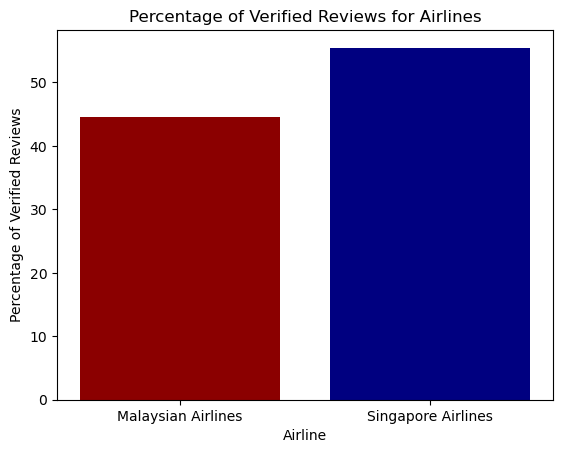

In [22]:
# Calculate the percentage of verified reviews
verification_counts['Percentage'] = (verification_counts['Verified Reviews'] / verification_counts['Verified Reviews'].sum()) * 100


# Custom colors for each category (dark blue and dark red)
dark_blue = (0, 0, 128)
dark_red = (139, 0, 0)

# Convert RGB to hexadecimal color codes
hex_blue = "#{:02x}{:02x}{:02x}".format(*dark_blue)
hex_red = "#{:02x}{:02x}{:02x}".format(*dark_red)


# Plotting the bar graph
plt.bar(verification_counts['Airline'], verification_counts['Percentage'], color=[hex_red, hex_blue])
plt.xlabel('Airline')
plt.ylabel('Percentage of Verified Reviews')
plt.title('Percentage of Verified Reviews for Airlines')
plt.show()

#### Explore differences between the two airline reviews

In [23]:
corpus = st.CorpusFromPandas(airlines_df, category_col="Airline", text_col="review", nlp=nlp).build()

In [24]:
html = st.produce_scattertext_explorer(corpus, category="Singapore Airlines", 
                                       category_name="Singapore Airlines",
                                       not_category_name="Malaysian Airlines",
                                       width_in_pixels=1000,
                                       metadata=airlines_df["Verification Status"])

In [25]:
file_name = "Airlines.html"

with open(file_name, "wb") as f:
    f.write(html.encode("utf-8"))

IFrame(src=file_name, width = 1200, height=700)

### Verified Reviews

In [26]:
verified_data = airlines_df[airlines_df['Verification Status'].isin(['Verified'])]

In [27]:
verified_data

,Verification Status,review,Airline
1,Verified,"Book the cook worked well, my seatmate got e...",Singapore Airlines
2,Verified,The customer service is a nightmare. I have ...,Singapore Airlines
4,Verified,The experience was very good on both Outboun...,Singapore Airlines
6,Verified,"It appears that Singapore Airlines slogan ""P...",Singapore Airlines
8,Verified,I used Singapore Airlines on 10 flights durin...,Singapore Airlines
...,...,...,...
2294,Verified,Kuala Lumpur to Kota Kinabalu return with Ma...,Malaysian Airlines
2297,Verified,I've been flying Malaysia Airlines whenever ...,Malaysian Airlines
2298,Verified,Manila to Kuala Lumpur. Again into a dirty c...,Malaysian Airlines
2300,Verified,London to Auckland return via Kuala Lumpur o...,Malaysian Airlines


#### Compare using verified reviews

In [ ]:
corpus_verified = st.CorpusFromPandas(verified_data, category_col="Airline", text_col="review", nlp=nlp).build()

In [ ]:
html_verified = st.produce_scattertext_explorer(corpus_verified, category="Singapore Airlines", 
                                       category_name="Singapore Airlines",
                                       not_category_name="Malaysian Airlines",
                                       width_in_pixels=1000,
                                       metadata=verified_data["Verification Status"])

In [ ]:
file_name = "Verfied_reviews_Airlines.html"

with open(file_name, "wb") as f:
    f.write(html_verified.encode("utf-8"))

IFrame(src=file_name, width = 1200, height=700)

##### Insights

- Words `excellent` and `best` are used in reviews more for Singapore Airlines (15%: Excellent, 16%: Best) than Malaysian Airlines (7%: Excellent, 8%: Best). 
- Words `Delayed` and `London` are used in reviews more for Malaysian Airlines (15%: Delayed, 16%: London) than Singapore Airlines (6%: Delayed, 8%: London).
- Reviews for both airlines shows concern regarding `2 hours` delays
- Overall `Premium economy`, `Book the cook`, `quiet` are more frequent in reviews in Singapore Airlines than Malaysian Airlines.
- Overall `Complain`, `Appalling`, `Golden Lounge` are more frequent in reviews in Malaysian Airlines than Singapore Airlines.


# Step 3: Sentiment Analysis

## Using wordcloud to analyse sentiment

In [ ]:
def analyze_sentiment(df, req_level, text_column):
    """
    Perform sentiment analysis and create a WordCloud for a specific airline level.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the reviews and airlines.
        airline_level (str): The specific level in the "airlines" column to analyze.
        text_column (str): The name of the column with text data.

    Returns:
        None
    """
    # Filter the DataFrame for the specific airline level
    subset_df = df[df['Airline'] == req_level]

    # Sentiment analysis using nltk
    sia = SentimentIntensityAnalyzer()
    subset_df['Sentiment_Score'] = subset_df[text_column].apply(lambda x: sia.polarity_scores(x)['compound'])


    # Create a WordCloud
    all_reviews = ' '.join(subset_df[text_column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {req_level}')
    plt.show()


In [ ]:
analyze_sentiment(verified_data, 'Singapore Airlines', 'review')


In [ ]:
analyze_sentiment(verified_data, 'Malaysian Airlines', 'review')

## Sentiment analysis


In [ ]:
# Filter the DataFrame for each airline

subset_SIA = verified_data[verified_data['Airline'] == 'Singapore Airlines']
subset_MAB = verified_data[verified_data['Airline'] == 'Malaysian Airlines']


### Singapore Airlines

In [ ]:
# Sentiment analysis using nltk
sia = SentimentIntensityAnalyzer()
subset_SIA['Sentiment_Score'] = subset_SIA['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Analyze overall sentiment
average_sentiment = subset_SIA['Sentiment_Score'].mean()
print(f'Average Sentiment: {average_sentiment:.2f}')

# Categorize sentiment
subset_SIA['Sentiment_Label'] = subset_SIA['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')



In [ ]:
# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = subset_SIA['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

# Calculate percentage for each sentiment label
sentiment_label_counts['Percentage'] = (sentiment_label_counts['Count'] / sentiment_label_counts['Count'].sum()) * 100


fig = px.bar(sentiment_label_counts, x='Sentiment_Label', y='Percentage', 
             title='Sentiment Labels Distribution for verified trips for Singapore Airlines',
             color='Sentiment_Label',
             color_discrete_map={'Positive': 'blue', 'Neutral': 'yellow', 'Negative': 'red'},
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of reviews'},
             )


# Add text annotations to each bar
for i, Percentage in enumerate(sentiment_label_counts['Percentage']):
    fig.add_annotation(
        x=sentiment_label_counts['Sentiment_Label'][i],
        y=Percentage + 2,  # Adjust the value for vertical positioning of the text
        text=str(round(Percentage))+'%',
        showarrow=False,
        font=dict(color='black', size=12)
    )
    
fig.update_layout(xaxis_title='Sentiment Label', yaxis_title='Percentage of reviews')
fig.show()

In [ ]:
subset_SIA

### Malaysian Airlines

In [ ]:
# Sentiment analysis using nltk
subset_MAB['Sentiment_Score'] = subset_MAB['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Analyze overall sentiment
average_sentiment_MAB = subset_MAB['Sentiment_Score'].mean()
print(f'Average Sentiment: {average_sentiment_MAB:.2f}')

# Categorize sentiment
subset_MAB['Sentiment_Label'] = subset_MAB['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')


In [ ]:
# Analyze sentiment labels distribution using Plotly
sentiment_label_counts_MAB = subset_MAB['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts_MAB.columns = ['Sentiment_Label', 'Count']

# Calculate percentage for each sentiment label
sentiment_label_counts_MAB['Percentage'] = (sentiment_label_counts_MAB['Count'] / sentiment_label_counts_MAB['Count'].sum()) * 100


figMAB = px.bar(sentiment_label_counts_MAB, x='Sentiment_Label', y='Percentage', 
             title='Sentiment Labels Distribution for verified trips for Malaysian Airlines',
             color='Sentiment_Label',
             color_discrete_map={'Positive': 'blue', 'Neutral': 'yellow', 'Negative': 'red'},
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of reviews'},
             )


# Add text annotations to each bar
for i, Percentage in enumerate(sentiment_label_counts_MAB['Percentage']):
    figMAB.add_annotation(
        x=sentiment_label_counts_MAB['Sentiment_Label'][i],
        y=Percentage + 2,  # Adjust the value for vertical positioning of the text
        text=str(round(Percentage))+'%',
        showarrow=False,
        font=dict(color='black', size=12)
    )
    
figMAB.update_layout(xaxis_title='Sentiment Label', yaxis_title='Percentage of reviews')
figMAB.show()

In [ ]:
subset_MAB

### Compare Sentiment of customer reviews between airlines

In [ ]:
sentiment_df = pd.concat([subset_SIA, subset_MAB], ignore_index=True)
sentiment_df

In [ ]:

# Concatenate the DataFrames
sentiment_df = pd.concat([subset_SIA, subset_MAB], ignore_index=True)

# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = sentiment_df.groupby(['Airline', 'Sentiment_Label']).size().reset_index(name='Count')

# Calculate percentage for each sentiment label
sentiment_label_counts['Percentage'] = (sentiment_label_counts['Count'] / sentiment_label_counts.groupby('Airline')['Count'].transform('sum')) * 100

data_plot = sentiment_label_counts.drop(columns=['Count'])

#transpose dataframe to create stacked bar plot

# Pivot the DataFrame
df_transposed = data_plot.pivot(index='Airline', columns='Sentiment_Label', values='Percentage')

# Reset the index for better readability (optional)
df_transposed.reset_index(inplace=False)

# Display the transposed DataFrame
print(df_transposed)


#Create stacked bar plot
fig = df_transposed.plot(kind="bar", stacked = True)
plt.title("Airline Reviews between Airlines - Sentiment Analysis")
plt.xlabel("Airline")
plt.ylabel("Sentiment")


# Show the plot
fig


#### Insights

- Overall customer review shows Singapore Airlines (72%) has more positive reviews than Malaysian Airlines (56%)
- As a percentage Malaysian Airlines has approximately twice (ratio: 1.6) as many negative reviews as Singapore Airlines.
- Premium exonomy class, booking meals and queit ambiance are likely to attract customers to Singapore Airlines
- Delayed flights are likely to adversely affect customers in Malaysian Airlines
- To ascertain the attributes associated with customer satisfaction-focused group discussions or comprehensive surveys should be conducted. The surveys should emphasize key areas, including the ambiance of the flight, quality of meals, lounge access, offers associated with different flight classes, and the handling of flight delays. Conducting these surveys will provide a thorough understanding of the factors influencing customer satisfaction within the specified group. 
